<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic18/1_Grokking_DL_hfst3_no_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

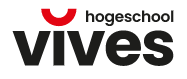<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# CHAPTER 3: INTRO TO NEURAL PREDICTION - FORWARD PROPAGATION

Hoofstuk 3 (pag 21-46) uit het boek "grokking Deep Learning" van Andrew W. Trask.

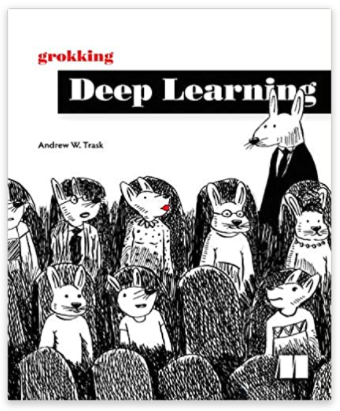

## Intro: Predict - Compare - Learn

Zie boek pag 16 (hoofdstuk 2)

### Stap 1: Voorspel obv data

Voorbeeld: voorspel of de [Boston Red Sox](https://en.wikipedia.org/wiki/Boston_Red_Sox) gaan winnen obv gegeven data en statistieken

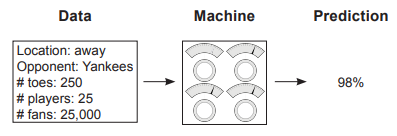

### Stap 2: Vergelijk met de werkelijkheid

In deze stap vergelijken we de voorspellingen met de labels. We gebruiken hiervoor een error of loss functie (bv. MSE of cross entropy).

Onze voorspelling is dat de kans op een overwinning van de Red Sox 98% is, maar in werkelijkheid hebben ze verloren. Dus de "echte" kans op een overwinning is 0%.

### Stap 3: Leer het patroon

In deze laatste stap draaien we aan de knoppen om onze voorspelling beter te maken. We gaan de gewichten (=parameters) van ons neuraal netwerk aanpassen mbv Gradient Descent. Dit doen we adhv de gradiënten van de loss functie, voorgesteld door de knoppen op de figuur. We spreken ook van gevoeligheden, want de gradiënt geeft aan hoe gevoelig een bepaald gewicht is voor de input data.

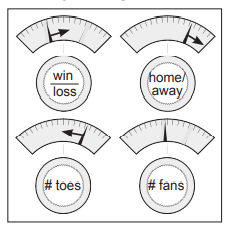

### Rekenvoorbeeld

Wat bedoelen we met "gevoeligheid"?

Nemen we het eenvoudigste geval, namelijk de vergelijking van een rechte:

> $y = ax + b$

met $y$ de voorspelling, $x$ de input data (= 1 feature), $a$ de richtingscoëfficiënt en $b$ de intercept.

Bijvoorbeeld:



In [ ]:
x = 5          # input
a = 10         # rico
b = 1          # intercept
y = a * x + b  # voorspelling
print(y)

51


Om de gevoeligheid van input $x$ voor predictie $y$ te kennen, moeten we wiskundig gezien de afgeleide nemen van $y$ naar $x$:

> $\frac{dy}{dx} = a$

De afgeleide is dus gelijk aan rico a. Aangezien het een rechte is, kan je die afgeleide eenvoudig als volgt berekenen:

> $\frac{y_{new} - y}{x_{new} - x} = a$

Waaruit volgt dat:

> $y_{new} = y + a (x_{new} - x)$

Mbv de afgeleide kunnen we inderdaad berekenen hoeveel $y$ zal veranderen als $x$ wordt aangepast. De afgeleide is dus inderdaad een "gevoeligheid" want hoe groter de afgeleide, hoe meer $y$ zal veranderen. Omgekeerd, als de afgeleide nul is, dan zal $y$ niet wijzigen als $x$ wordt aangepast.

In ons voorbeeld wordt dat dan:

In [ ]:
x_new = 6                     # nieuwe input
y_new = y + (x_new - x) * a   # nieuwe voorspelling
print(y_new)

61


Op de grafiek van $y$ in functie van $x$ zien we inderdaad dat de toename/afname van $y$ 10 keer groter/kleiner is dan die van $x$.

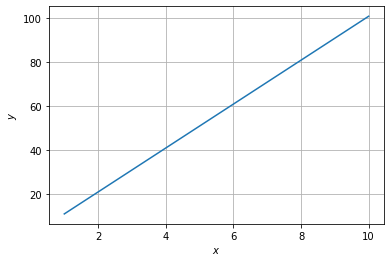

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = 10
b = 1
x = np.linspace(1, 10, 50)
plt.plot(x, a * x + b)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid();

## A simple neural network making a prediction

boek pag 24 ev

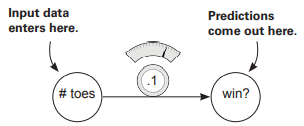

Ons model is hier gelijk aan:

> $y = wx$

In [ ]:
def neural_network(input, weight):
    prediction = input * weight
    return prediction

In [ ]:
# x is gemiddeld aantal "toes" (= baseball term) van de spelers (number_of_toes)
# w is het gewicht (weight)
# y is de voorspelling (kans op overwinning)
number_of_toes = [8.5, 9.5, 10, 9]
neural_network(input=number_of_toes[0], weight=0.1)  # we nemen enkel het eerste datapunt

0.8500000000000001

**Opdracht**: Maak de voorspelling voor alle datapunten. Stop de voorspellingen in een list. Schrijf Pythonic code!

## Making a prediction with multiple inputs

boek pag 28 ev

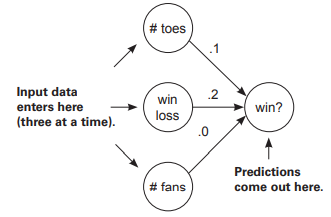

Ons model is hier gelijk aan:

> $y = w_1x_1 + w_2x_2 + w_3x_3$

Meestal schrijft men dat met een sommatieteken:

> $y = \sum_{j=1}^{3} w_jx_j$

Dit noemt men een gewogen som (weighted sum) of inwendig product of scalair product

In [ ]:
def weighted_sum(a, b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += a[i] * b[i]
    return output

def neural_network(input, weights):
    prediction = weighted_sum(input, weights)
    return prediction

In [ ]:
toes = [8.5, 9.5, 9.9, 9.0]
win_loss = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

neural_network([toes[0], win_loss[0], nfans[0]], weights=[0.1, 0.2, 0])  # enkel eerste datapunt

0.9800000000000001

**Opdracht**: Maak de voorspelling voor alle datapunten. Stop de voorspellingen in een list. Schrijf Pythonic code!

**Opdracht**: Maak nu gebruik van NumPy zodat je de functies niet meer nodig hebt en de bewerking in 1 lijntje code uitvoert!

## Making a prediction with multiple outputs

boek pag 36 ev

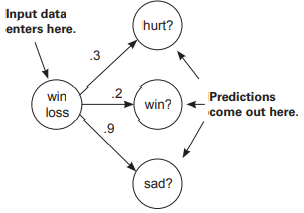

Ons model is hier gelijk aan:

> $\begin{cases} y_1 = w_1x \\ y_2 = w_2x \\ y_3 = w_3x \end{cases}$

Of gebruik makend van indexvariabele $i$:

> $y_i = w_ix \mbox{  met i = 1, 2, 3}$

Hiervoor moeten we overeenkomstige elementen van 2 arrays vermenigvuldigen

In [ ]:
def element_mult(number, vector):  # elementwise multiplication
    output = []
    for element in vector:
        output.append(number * element)
    return output

def neural_network(input, weights):
    prediction = element_mult(input, weights)
    return prediction

In [ ]:
weights = [0.3, 0.2, 0.9]
win_loss = [0.65, 0.8, 0.8, 0.9]
neural_network(win_loss[0], weights)  # enkel eerste datapunt

[0.195, 0.13, 0.5850000000000001]

**Opdracht**: Maak de voorspelling voor alle datapunten. Stop de voorspellingen in een list. Schrijf Pythonic code!

**Opdracht**: Maak nu gebruik van NumPy zodat je de functies niet meer nodig hebt en ook lussen vermijdt!

## Predicting with multiple inputs and outputs

boek pag 38 ev

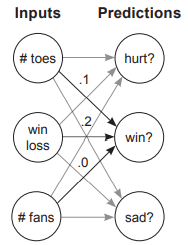

Ons model is hier gelijk aan:

> $\begin{cases} y_1 = w_{11}x_1 + w_{12}x_2 + w_{13}x_3 \\
y_2 = w_{21}x_1 + w_{22}x_2 + w_{23}x_3 \\
y_3 = w_{31}x_1 + w_{32}x_2 + w_{33}x_3 \end{cases}$

Of gebruik makend van indexvariabelen $i$ en $j$:

> $y_i = \sum_{j=1}^3w_{ij}x_j \mbox{  met i= 1, 2, 3}$

Hiervoor moeten we dus de gewogen som berekenen van een rij uit de matrix met gewichten en de vector met features

In [ ]:
# gewogen som
def weighted_sum(a, b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += a[i] * b[i]
    return output

# gewogen som van elke rij van een matrix met een vector
def vector_matrix_mult(vector, matrix):
    assert(len(vector) == len(matrix))  # lengte vector = aantal matrix rijen
    output = []
    for row in matrix:
        output.append(weighted_sum(vector, row))
    return output

def neural_network(input, weights):
    prediction = vector_matrix_mult(input, weights)
    return prediction

In [ ]:
toes = [8.5, 9.5, 9.9, 9.0]
win_loss = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

weights = [[0.1, 0.1, -0.3], # hurt?
           [0.1, 0.2, 0.0],  # win?
           [0.0, 1.3, 0.1]]  # sad?

neural_network([toes[0], win_loss[0], nfans[0]], weights)  # enkel eerste datapunt

[0.555, 0.9800000000000001, 0.9650000000000001]

**Opdracht**: Maak de voorspelling voor alle datapunten. Stop de voorspellingen in een list. Schrijf Pythonic code!

**Opdracht**: Maak nu gebruik van NumPy zodat je de functies en lussen niet meer nodig hebt!

## Predicting on predictions: neural networks can be stacked!

boek pag 42 ev

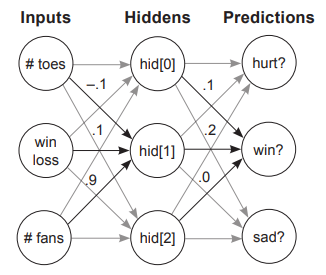

Ons model wordt nu al een stuk complexer, want we hebben nu 2 lagen.

In laag 1 berekenen we adhv de input $x_j$ een tussentijds resultaat $h_i$:

> $\begin{cases} h_1 = w_{111}x_1 + w_{112}x_2 + w_{113}x_3 \\
h_2 = w_{121}x_1 + w_{122}x_2 + w_{123}x_3 \\
h_3 = w_{131}x_1 + w_{132}x_2 + w_{133}x_3 \end{cases}$

Of gebruik makend van het sommatieteken en indexvariabelen $i$ en $j$:

> $h_i = \sum_{j=1}^3 w_{1ij}x_j \mbox{  met i= 1, 2, 3}$

In laag 2 gebruiken we output $h_i$ als input om de voorspellingen $y_i$ te krijgen:

> $\begin{cases} y_1 = w_{211}h_1 + w_{212}h_2 + w_{213}h_3 \\
y_2 = w_{221}h_1 + w_{222}h_2 + w_{223}h_3 \\
y_3 = w_{231}h_1 + w_{232}h_2 + w_{233}h_3 \end{cases}$

Of opnieuw gebruik makend van het sommatieteken:

> $y_i = \sum_{j=1}^3 w_{2ij}h_j \mbox{  met i= 1, 2, 3}$

We kunnen de uitdrukking van laag 1 hierin substitueren om ons uiteindelijke model te krijgen:

> $y_i = \sum_{j=1}^3 (w_{2ij}\sum_{k=1}^3w_{1jk}x_k) \mbox{  met i= 1, 2, 3}$

Je merkt dus dat het ingewikkeld begint te worden. Laten we daarom overgaan tot Python code wat makkelijker is om te begrijpen :-)


In [ ]:
# inwendig product
def weighted_sum(a, b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += a[i] * b[i]
    return output

# inwendig product van elke rij van een matrix en een vector
def vector_matrix_mult(vector, matrix):
    assert(len(vector) == len(matrix))
    output = []
    for row in matrix:
        output.append(weighted_sum(vector, row))
    return output

def neural_network(input, weights):
    hidden = vector_matrix_mult(input, weights[0])  # laag 1
    prediction = vector_matrix_mult(hidden, weights[1])  # laag 2
    return prediction

In [ ]:
                        #toes   #win  #fans
weights_input_hidden = [[ 0.1,   0.2,  -0.1],  # hid[0]
                        [-0.1,   0.1,   0.9],  # hid[1]
                        [ 0.1,   0.4,   0.1]]  # hid[2]

                       #hid[0] #hid[1] #hid[1]
weights_hidden_pred  = [[ 0.3,   1.1,  -0.3],  # hurt?
                        [ 0.1,   0.2,   0.0],  # win?
                        [ 0.0,   1.3,   0.1]]  # sad?

weights = [weights_input_hidden, weights_hidden_pred]  # 3D array

toes = [8.5, 9.5, 9.9, 9.0]
win_loss = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

neural_network([toes[0], win_loss[0], nfans[0]], weights)  # we nemen enkel het eerste datapunt

[0.21350000000000002, 0.14500000000000002, 0.5065]

**Opdracht**: Maak de voorspelling voor alle datapunten. Stop de voorspellingen in een list. Schrijf Pythonic code!

**Opdracht**: Maak nu gebruik van NumPy zodat je de functies en lussen niet meer nodig hebt!

---